# Airline Satisfaction Prediction
### The goal of this notebook is to explore the dataset and find a relationship between customer satisfaction and other variables. Then build prediction models to predict customer satisfaction

In [84]:
# import modules
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [85]:
# ignore output warnings (NOTE: run this only when you are sure you don't need the warnings)
warnings.filterwarnings('ignore')

In [86]:
# read data in
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.set_index('ID', inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [87]:
# check some statistics
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Ideally we will want to build our model based on unbiased and clean data. To do so first we will check the columns and their values to make sure everything is in a friendly format for our model building

### Check and replace null values

In [88]:
# check for null values
df.isnull().sum()
# There are null values in the column 'Arrival Delay'

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [89]:
# fill null value with median value
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)
# check result
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

### Check and replace outliers

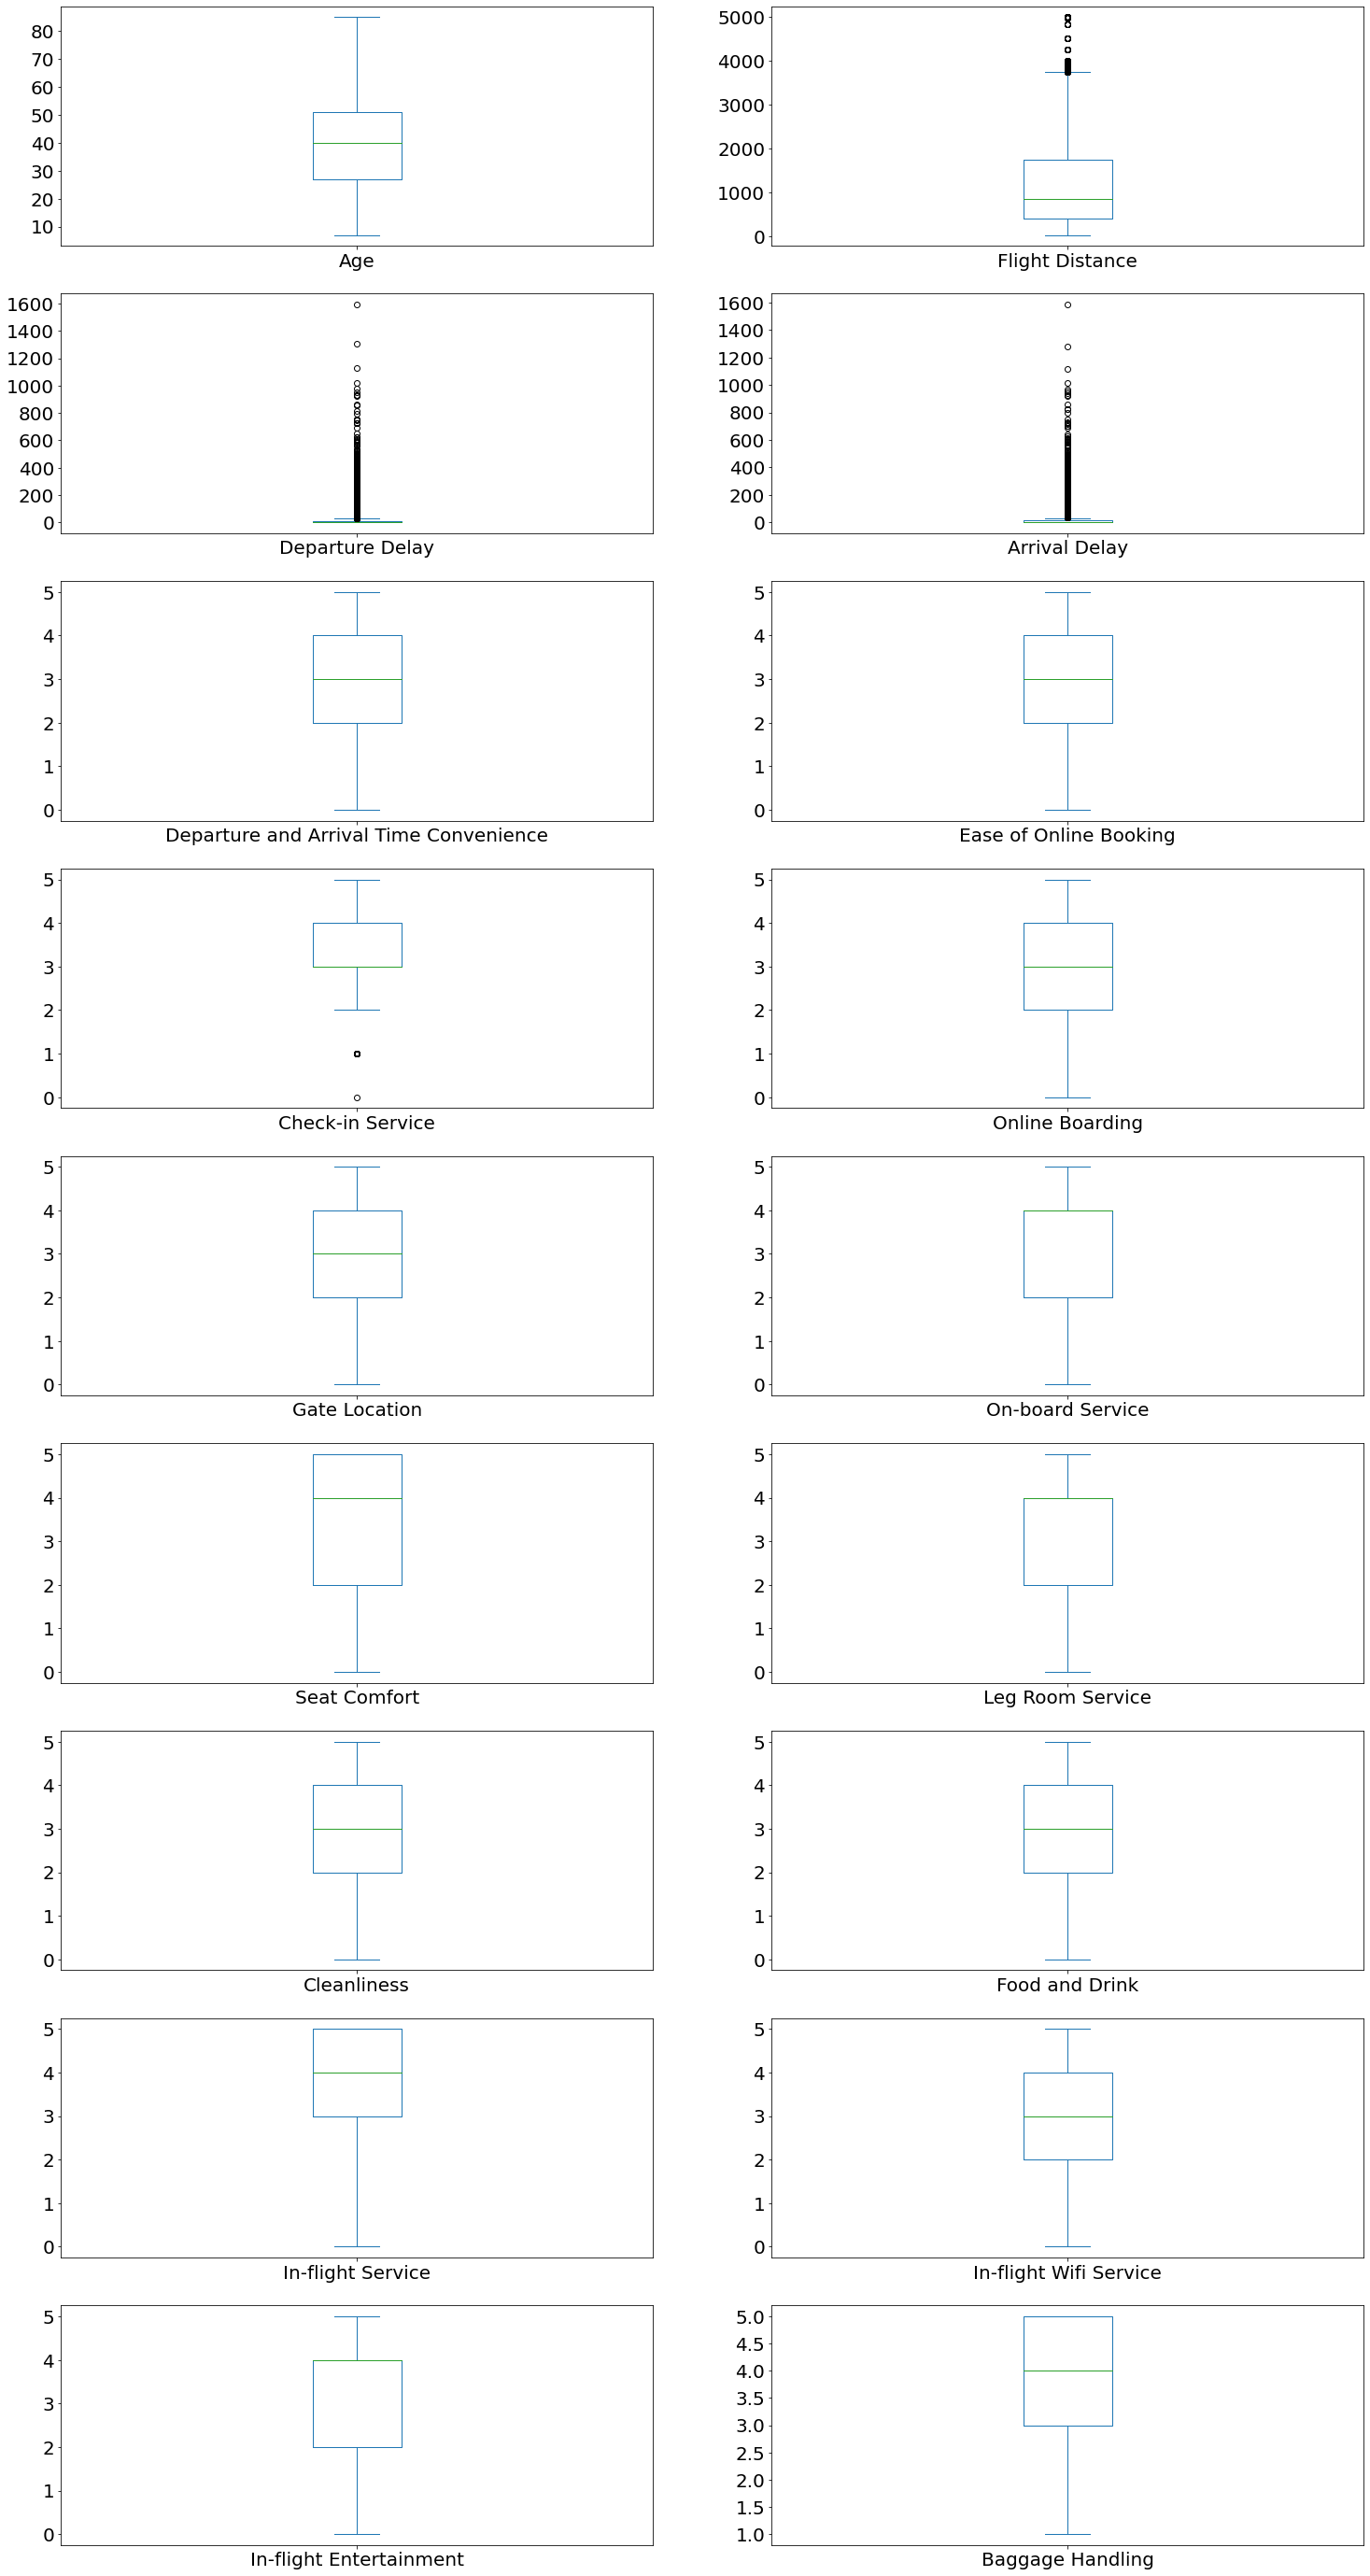

In [103]:
# check outliers
df.plot(kind='box', subplots=1, layout=(9,2), figsize=(25,50), fontsize=20)
plt.show()

In [114]:
# define a function that can replace outliers, this function will use mean value to replace outliers
def replaceOutliers(df, colname):
    
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    mean = df[colname].mean()
    df[colname] = np.where(df[colname] < upper, np.where(df[colname] > lower, df[colname], mean), mean)
    plt.rcParams['figure.figsize'] = 10, 5
    sns.boxplot(df[colname], data=df)

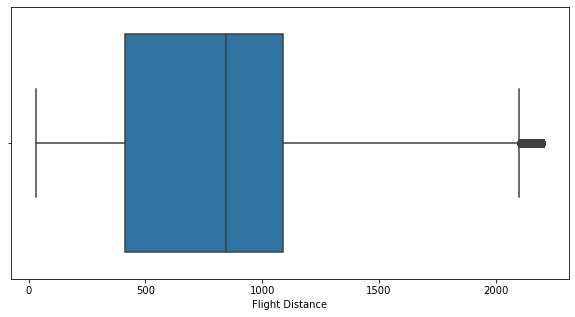

In [115]:
replaceOutliers(df, 'Flight Distance')

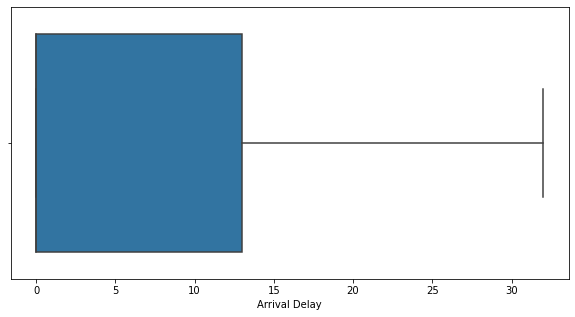

In [116]:
replaceOutliers(df, 'Arrival Delay')

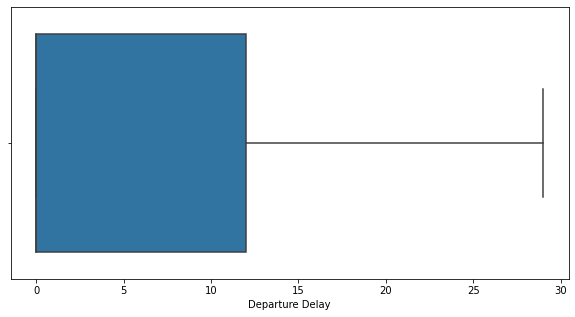

In [117]:
replaceOutliers(df, 'Departure Delay')

### Do EDA if needed

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  float64
 6   Departure Delay                         129880 non-null  float64
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

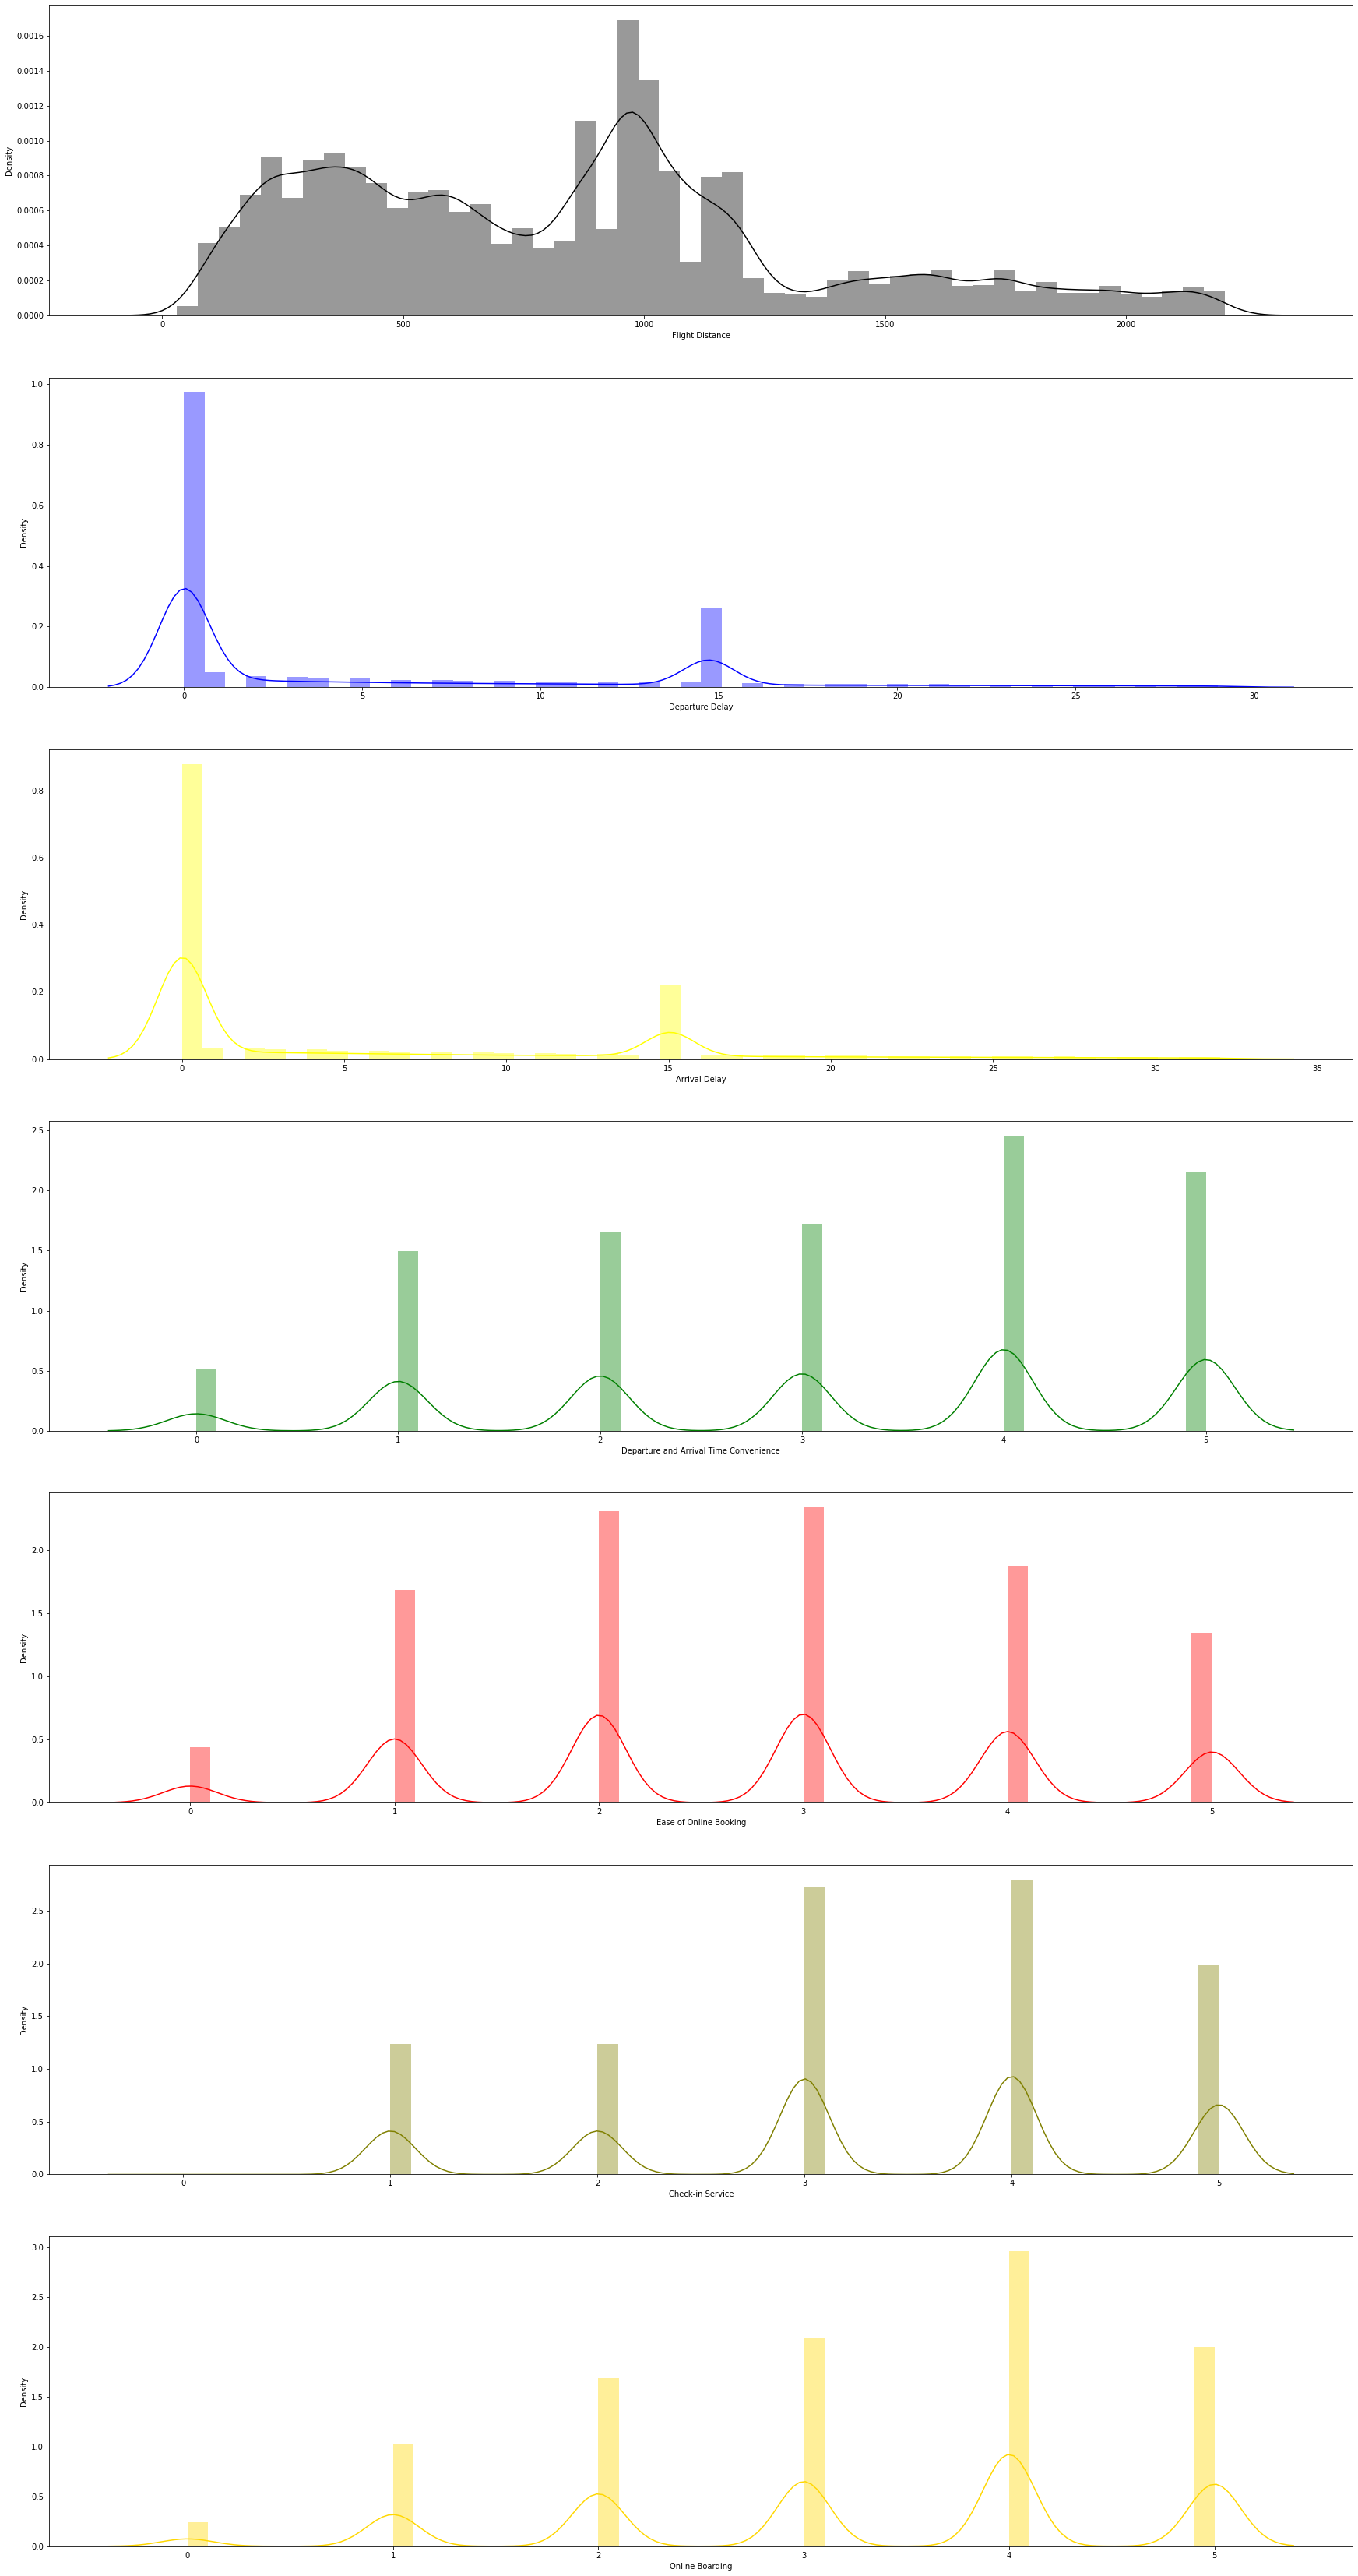

In [118]:
# check histgram of column 5 to column 11
color_pool = ['black', 'blue', 'yellow', 'green', 'red', 'olive', 'gold']
fig, axes = plt.subplots(7, 1, figsize=(30, 60))
for i in range(7):
    sns.distplot(df.iloc[:, i+5], color=color_pool[i], ax=axes[i])

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

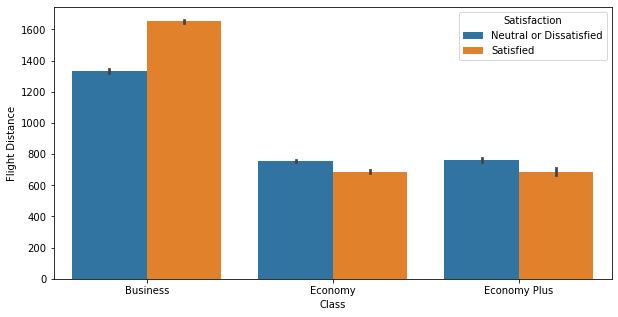

In [63]:
plt.rcParams['figure.figsize'] = 10, 5
# check fight distance and satisfaction among different classes
# It shows Business class passangers are more satisfied and the flight distance is high for Business class  
sns.barplot(x="Class", y="Flight Distance", data=df, hue="Satisfaction")

<AxesSubplot:xlabel='Satisfaction', ylabel='Cleanliness'>

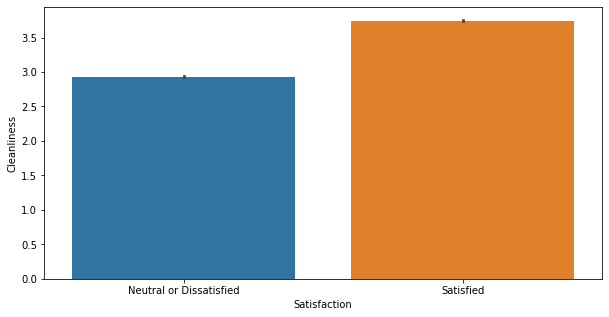

In [64]:
# check satisfaction with cleanliness
# it shows a higher cleanliness may let the passanger fell more satisfied
sns.barplot(x="Satisfaction", y="Cleanliness", data=df)

## Now, Let's build a classification models to predict passanger satisfication

### label encoding for catagorical values

In [65]:
# do encoding
for i in df.columns:
    if df[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df[i]=label_encoder.fit_transform(df[i])

In [66]:
# check encoding result
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,1,48,0,0,0,821.0,2.000000,5.000000,3,3,...,3,5,2,5,5,5,3,5,5,0
2,0,35,1,0,0,821.0,26.000000,15.045465,2,2,...,5,4,5,5,3,5,2,5,5,1
3,1,41,1,0,0,853.0,0.000000,0.000000,4,4,...,3,5,3,5,5,3,4,3,3,1
4,1,50,1,0,0,1905.0,0.000000,0.000000,2,2,...,5,5,5,4,4,5,2,5,5,1
5,0,49,1,0,0,3470.0,0.000000,1.000000,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,1,28,1,1,2,447.0,2.000000,3.000000,4,4,...,5,1,4,4,4,5,4,4,4,0
129877,1,41,1,1,2,308.0,0.000000,0.000000,5,3,...,5,2,5,2,2,4,3,2,5,0
129878,1,42,1,1,2,337.0,6.000000,14.000000,5,2,...,3,3,4,3,3,4,2,3,5,0


<AxesSubplot:>

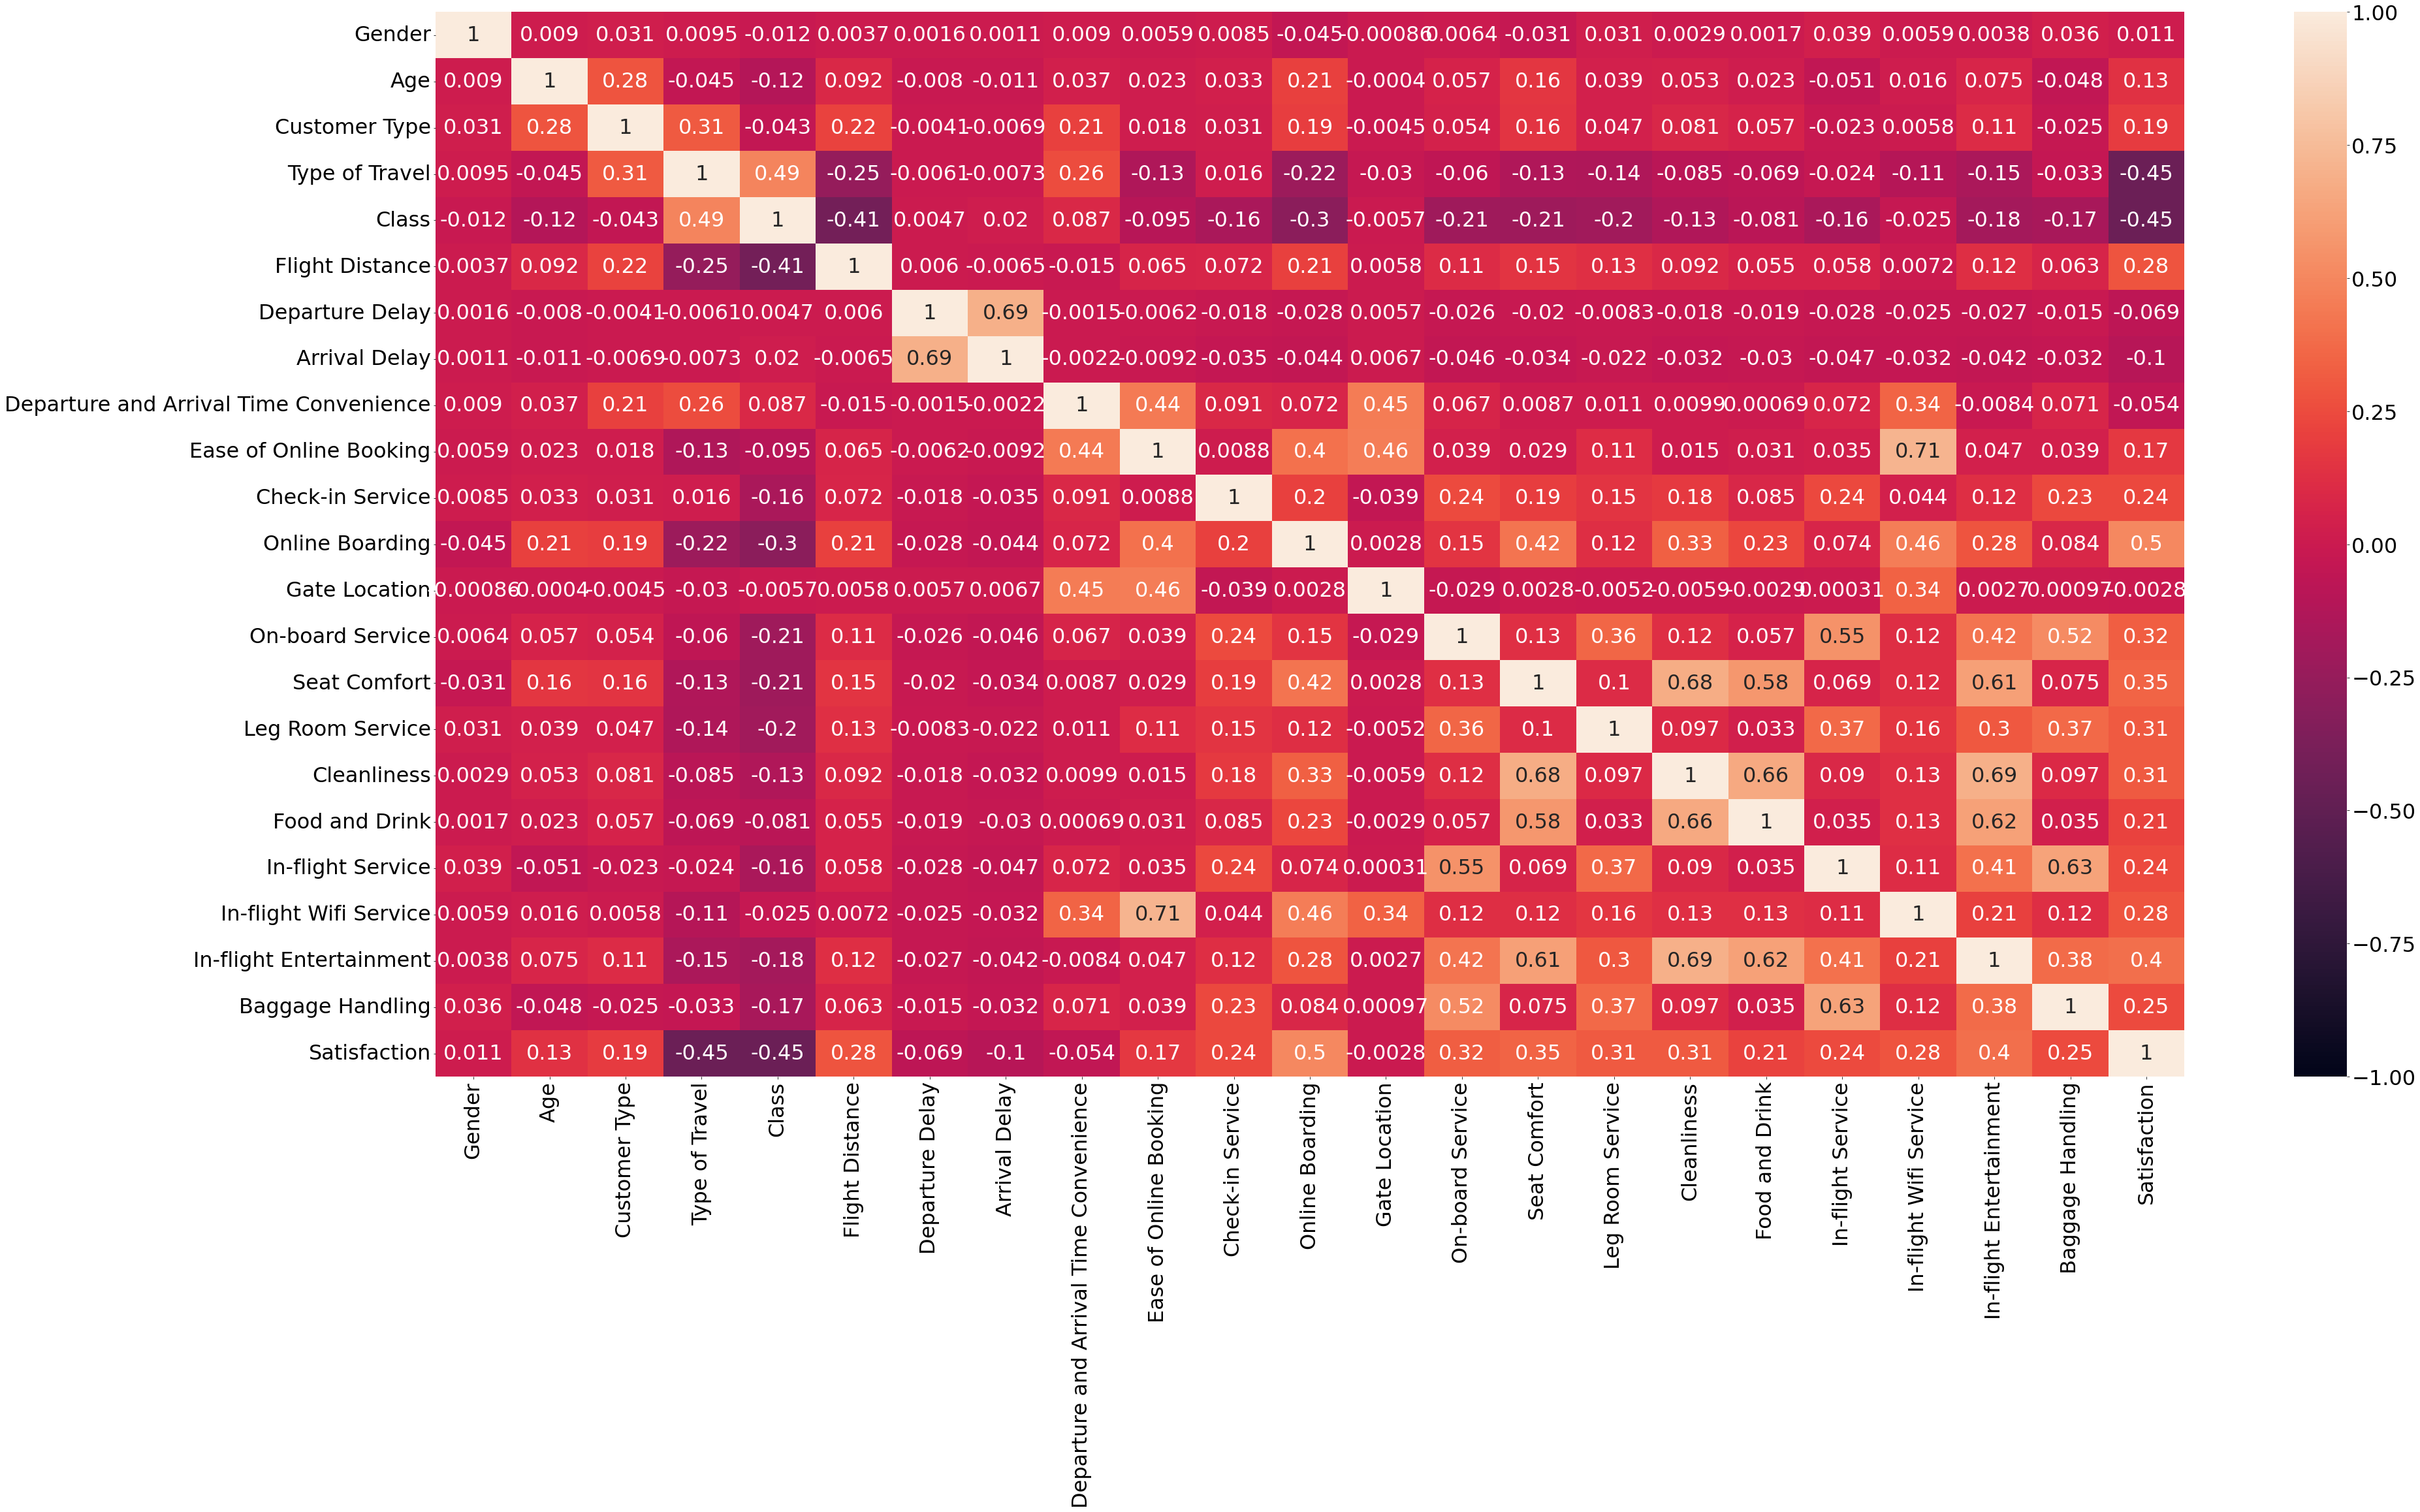

In [67]:
plt.rcParams['figure.figsize'] = 60, 30
plt.rcParams.update({'font.size': 32})
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

#### From the correlation matrix, we can infer what variables should be included in our regression. We now choose vairable with an absolute value over 0.3 to be our start.
### Variables
   - Class (-0.45)
   - Type of Travel (-0.45)
   - Online Boarding (0.5)
   - On-Board Services (0.32)
   - Seat Comfort (0.35)
   - Leg Room Service (0.31)
   - Cleanliness (0.31)
   - In-Flight Entertainment (0.4)

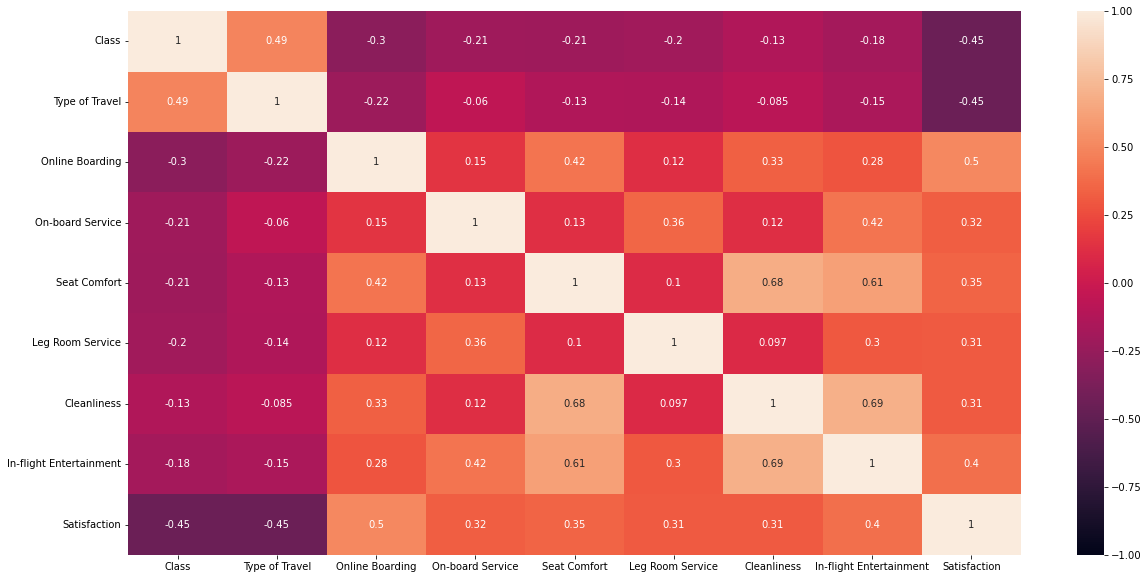

In [68]:
Vars = df[["Class", "Type of Travel", "Online Boarding",
           "On-board Service", "Seat Comfort", "Leg Room Service",
           "Cleanliness", "In-flight Entertainment", "Satisfaction"]]
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 10})
heatmap = sns.heatmap(Vars.corr(), vmin=-1, vmax=1, annot=True)

We can find that our chosen variables has multicollinearity that are around 0.6-0.7, which could give us issues. Since our data are non-negative, we can use chi-squared test to help us check the independence of variables.

In [69]:
# x and y variables
y = Vars['Satisfaction']
x = Vars.drop(['Satisfaction'], axis=1)

In [70]:
scores, p_values = chi2(x, y)
scores, p_values

(array([16962.71190671, 18151.63418987, 18340.34401786,  6602.7101349 ,
         7993.08635562,  6554.60564311,  6429.59779579, 10916.10712129]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]))

### First use logistic regression to build the model

### Set test data size to 20%, training data size to 80%

In [71]:
# create training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [72]:
# training model
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [73]:
y_pred = classifier.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8489759778256852

### Now let's choose variables in the consideration of chi-square stats scores, p-values, and correlations

In [74]:
# we will choose variables based on chi-square stats scores, p-values, correlations
y_feature = df['Satisfaction']
x_features = df.drop(['Satisfaction'], axis=1)
scores, p_values = chi2(x_features, y_feature)
scores=["{0:5f}".format(x)for x in scores] 
p_values=["{0:.7f}".format(x)for x in p_values]
features_dict = {}
corr = df.corr()
for idx, col in enumerate(x_features.columns):
    features_dict[col] = [scores[idx], p_values[idx], corr['Satisfaction'][idx]]
features_dict

{'Gender': ['8.319769', '0.0039216', 0.011236116189643706],
 'Age': ['13539.489346', '0.0000000', 0.13409123867754694],
 'Customer Type': ['822.844959', '0.0000000', 0.18601719069551098],
 'Type of Travel': ['18151.634190', '0.0000000', -0.4498612546656386],
 'Class': ['16962.711907', '0.0000000', -0.4481933767906072],
 'Flight Distance': ['7627839.653970', '0.0000000', 0.2828423263318491],
 'Departure Delay': ['6492.217397', '0.0000000', -0.06857837913199491],
 'Arrival Delay': ['14720.847973', '0.0000000', -0.0998437878859511],
 'Departure and Arrival Time Convenience': ['291.611324',
  '0.0000000',
  -0.054269710493736585],
 'Ease of Online Booking': ['2639.965094', '0.0000000', 0.1688771390528303],
 'Check-in Service': ['3545.003037', '0.0000000', 0.23725236030899546],
 'Online Boarding': ['18340.344018', '0.0000000', 0.5017494207376211],
 'Gate Location': ['0.556433', '0.4557009', -0.002793274652471092],
 'On-board Service': ['6602.710135', '0.0000000', 0.3222048233927061],
 'Seat

#### This time, I'll choose these variables
### Variables:
   - Type of Travel 
   - Class 
   - **Flight Distance**
   - Online Boarding 
   - On-Board Services 
   - Seat Comfort 
   - Leg Room Service 
   - Cleanliness
   - **In-flight Wifi Service**
   - In-Flight Entertainment 
   
### Use the above variables to build another logistic regression model

In [75]:
# train new models
Vars1 = df[["Class", "Type of Travel", "Online Boarding", "Flight Distance",
            "On-board Service", "Seat Comfort", "Leg Room Service",
            "Cleanliness", "In-flight Wifi Service", "In-flight Entertainment",
            "Satisfaction"]]
# x and y variables
y1 = Vars1['Satisfaction']
x1 = Vars1.drop(['Satisfaction'], axis=1)
# create training and test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
# training model
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(x1_train, y1_train)

LogisticRegression(random_state=0)

In [76]:
y1_pred = classifier1.predict(x1_test)
metrics.accuracy_score(y1_test, y1_pred)

0.8164074530335694

### Let's use MLP to build a model (MLP model may need quite amount of time to train)

In [80]:
# let's use the same training and test data of our two logistic models above to
# train the MLP model
MLPclf = MLPClassifier(random_state=0, activation='logistic')
MLPclf.fit(x_train, y_train)
MLP_y_pred = MLPclf.predict(x_test)
metrics.accuracy_score(y_test, MLP_y_pred)

0.9054896827841085

In [81]:
# use a different activation function to train another model
MLPclf1 = MLPClassifier(random_state=0, activation='relu')
MLPclf1.fit(x_train, y_train)
MLP_y_pred = MLPclf1.predict(x_test)
metrics.accuracy_score(y_test, MLP_y_pred)

0.9078380043116723